In [5]:
import numpy
import pandas
import seaborn
import matplotlib
from PIL import Image
import tensorflow as tf
import tensorflow.keras as keras
import sklearn

In [4]:
import zipfile
# Mount your google drive
# You can place data.zip in your google drive
# I have created App folder and keeping data.zip and code python file in that directory

from google.colab import drive
drive.mount('/content/drive/')

# Load and unzip the dataset
zip_path = '/content/drive/My Drive/data.zip'
extract_dir ='/content/drive/My Drive/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Data extracted to:", extract_dir)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Data extracted to: /content/drive/My Drive/


In [6]:
# prompt: Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

import numpy as np
import os

def load_and_crop_image(image_path, target_size=(224, 224)):
    """Loads an image, crops it to the target size, and returns it as a NumPy array.

    Args:
        image_path: The path to the image file.
        target_size: A tuple (width, height) specifying the target size for cropping.

    Returns:
        A NumPy array representing the cropped image, or None if the image could not be loaded.
    """
    try:
        img = Image.open(image_path)
        # Ensure the image is in RGB format
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Calculate cropping coordinates to center the image
        width, height = img.size
        left = (width - target_size[0]) // 2
        top = (height - target_size[1]) // 2
        right = (width + target_size[0]) // 2
        bottom = (height + target_size[1]) // 2

        # Crop the image
        img = img.crop((left, top, right, bottom))

        # Resize the image to the target size (optional, but good practice)
        img = img.resize(target_size)

        # Convert the image to a NumPy array
        img_array = np.array(img)
        return img_array

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"Error loading or cropping image {image_path}: {e}")
        return None


In [7]:
# prompt: Create a function to load the images.

import numpy as np
def load_images_from_directory(directory, target_size=(224, 224)):
    """Loads all images from a directory and returns them as a NumPy array.

    Args:
        directory: The path to the directory containing the images.
        target_size: A tuple (width, height) specifying the target size for cropping.

    Returns:
        A NumPy array representing the loaded images, or None if no images were found.
    """
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    if not image_files:
        print(f"Error: No images found in directory {directory}")
        return None

    images = []
    for filename in image_files:
        image_path = os.path.join(directory, filename)
        img_array = load_and_crop_image(image_path, target_size)
        if img_array is not None:
            images.append(img_array)

    if not images:  # Check if any images were successfully loaded
        print(f"Error: No images could be loaded from {directory}")
        return None

    return np.array(images)


In [8]:
import os
import numpy as np
from PIL import Image

def load_and_crop_image(image_path, target_size=(224, 224)):
    """Loads an image, crops it to the target size, and returns it as a NumPy array.

    Args:
        image_path: The path to the image file.
        target_size: A tuple (width, height) specifying the target size for cropping.

    Returns:
        A NumPy array representing the cropped image, or None if the image could not be loaded.
    """
    try:
        img = Image.open(image_path)
        # Ensure the image is in RGB format
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Calculate cropping coordinates to center the image
        width, height = img.size
        left = (width - target_size[0]) // 2
        top = (height - target_size[1]) // 2
        right = (width + target_size[0]) // 2
        bottom = (height + target_size[1]) // 2

        # Crop the image
        img = img.crop((left, top, right, bottom))

        # Resize the image to the target size (optional, but good practice)
        img = img.resize(target_size)

        # Convert the image to a NumPy array
        img_array = np.array(img)
        return img_array

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"Error loading or cropping image {image_path}: {e}")
        return None


def load_images_from_directory(directory, target_size=(224, 224)):
    """Loads all images from subdirectories within a directory.

    Args:
        directory: The path to the directory containing subdirectories with images.
        target_size: A tuple (width, height) specifying the target size for cropping.

    Returns:
        A tuple containing:
            images: A NumPy array representing the loaded images.
            labels: A NumPy array representing the corresponding labels.
    """
    images = []
    labels = []

    # Get list of subdirectories (categories)
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

    # Check if categories is empty and print directory contents
    if not categories:
        print(f"Error: No subdirectories (categories) found in {directory}")
        print(f"Directory contents: {os.listdir(directory)}")  # Print to see what's inside
        return None, None

    for category in categories:
        category_path = os.path.join(directory, category)
        image_files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

        for filename in image_files:
            image_path = os.path.join(category_path, filename)
            img_array = load_and_crop_image(image_path, target_size)
            if img_array is not None:
                images.append(img_array)
                labels.append(category)  # Use category name as label

    if not images:  # Check if any images were successfully loaded
        print(f"Error: No images could be loaded from {directory}")
        return None, None

    return np.array(images), np.array(labels)

# Assuming your image data is in '/content/drive/My Drive/data' and labels in 'labels.csv'
image_directory = '/content/drive/My Drive/data'  # Updated directory path

# Load images and labels
images, labels = load_images_from_directory(image_directory)

# Check if both images and labels were loaded successfully
if images is not None and labels is not None:
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Further processing or model training...
else:
    print("Failed to load images or labels. Check the file paths and formats.")

Images shape: (7625, 224, 224, 3)
Labels shape: (7625,)


In [9]:
# import os
# print(os.listdir('/content/drive/My Drive/data'))

In [10]:
# prompt:     # Get the images and their labels

# Assuming your image data is in '/content/drive/My Drive/data' and labels in 'labels.csv'
image_directory = '/content/drive/My Drive/data'  # Updated directory path

# Load images and labels
images, labels = load_images_from_directory(image_directory)

# Check if both images and labels were loaded successfully
if images is not None and labels is not None:
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    # Further processing or model training...
else:
    print("Failed to load images or labels. Check the file paths and formats.")


Images shape: (7625, 224, 224, 3)
Labels shape: (7625,)


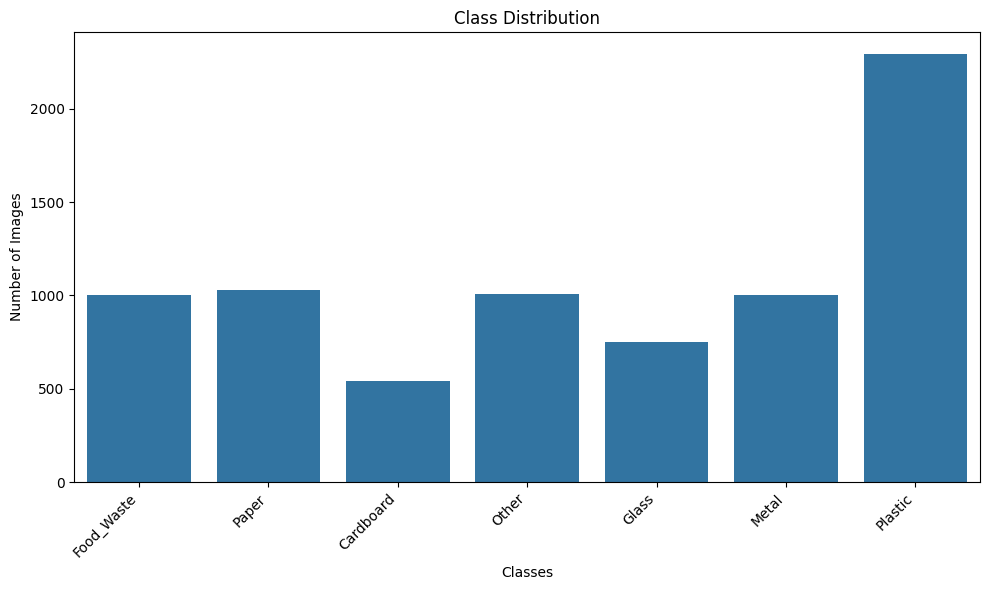

In [11]:
# prompt: # Visualise Data Distribution
# bar plot to display the class distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'labels' is your NumPy array of labels
if labels is not None:
    # Count the occurrences of each class
    class_counts = {}
    for label in labels:
        class_counts[label] = class_counts.get(label, 0) + 1

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.title("Class Distribution")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("Labels array is empty or None. Cannot create the bar plot.")


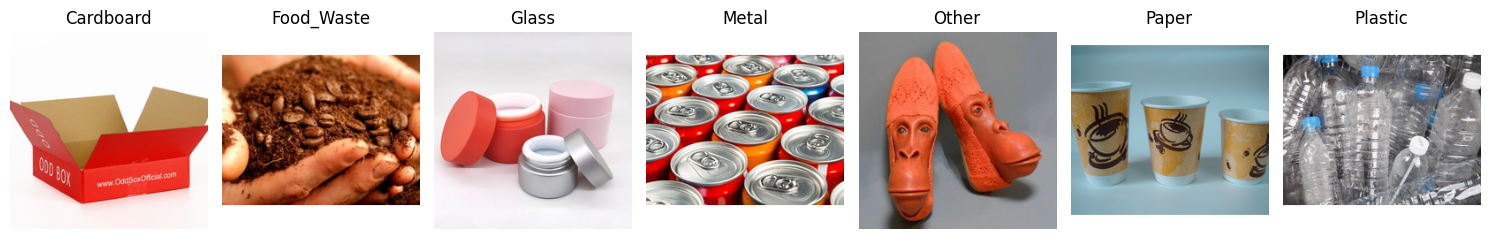

In [12]:
# prompt: # Visualise Sample Images (across different labels)

import matplotlib.pyplot as plt
import numpy as np
# Visualize some sample images from different classes
if images is not None and labels is not None:
    num_classes_to_show = min(len(np.unique(labels)), 10)  # Show up to 10 classes
    fig, axes = plt.subplots(1, num_classes_to_show, figsize=(15, 5))

    for i, class_label in enumerate(np.unique(labels)[:num_classes_to_show]):
        class_indices = np.where(labels == class_label)[0]
        if class_indices.size > 0:  # Check if any images are found for this label
            image_index = np.random.choice(class_indices)
            axes[i].imshow(images[image_index])
            axes[i].set_title(class_label)
            axes[i].axis('off')
        else:
            axes[i].text(0.5, 0.5, f'No images for class: {class_label}', ha='center', va='center')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Images or labels are not loaded correctly, cannot plot samples.")


In [13]:
# prompt: # Find the smallest and largest image dimensions from the data set

import os
from PIL import Image

def get_image_dimensions(image_directory):
    """
    Finds the smallest and largest image dimensions in a directory.

    Args:
        image_directory: The path to the directory containing images.

    Returns:
        A tuple containing the smallest and largest dimensions (width, height) as tuples,
        or None if no images are found or an error occurs.
    """

    min_dimensions = None
    max_dimensions = None

    for filename in os.listdir(image_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Add more extensions if needed
            image_path = os.path.join(image_directory, filename)
            try:
                with Image.open(image_path) as img:
                    width, height = img.size
                    if min_dimensions is None or width < min_dimensions[0] or height < min_dimensions[1]:
                        min_dimensions = (width, height)
                    if max_dimensions is None or width > max_dimensions[0] or height > max_dimensions[1]:
                        max_dimensions = (width, height)
            except (IOError, OSError) as e:
                print(f"Error opening image {filename}: {e}")
                continue  # Skip this file and continue with others

    return min_dimensions, max_dimensions

# Example usage
image_dir = '/content/drive/My Drive/data'  # Replace with your image directory
min_dims, max_dims = get_image_dimensions(image_dir)


if min_dims and max_dims:
    print("Smallest image dimensions:", min_dims)
    print("Largest image dimensions:", max_dims)
else:
    print("No images found or an error occurred.")


No images found or an error occurred.


In [14]:
# prompt: # Resize the image dimensions

# Example usage
image_dir = '/content/drive/My Drive/data'  # Replace with your image directory
min_dims, max_dims = get_image_dimensions(image_dir)


if min_dims and max_dims:
    print("Smallest image dimensions:", min_dims)
    print("Largest image dimensions:", max_dims)
else:
    print("No images found or an error occurred.")


No images found or an error occurred.


In [15]:
# prompt: # Encode the labels suitably
# for target class we have 7 labels ['Food_Waste', 'Paper', 'Cardboard', 'Other', 'Glass', 'Metal', 'Plastic']

from sklearn.preprocessing import LabelEncoder

# Assuming 'labels' is your NumPy array of labels
if labels is not None:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the labels
    encoded_labels = label_encoder.fit_transform(labels)

    # Print the mapping between original and encoded labels
    print("Label Mapping:")
    for i, original_label in enumerate(label_encoder.classes_):
        print(f"{original_label} -> {i}")

    # Now 'encoded_labels' contains the numerically encoded labels
    print("\nEncoded Labels:", encoded_labels)

    #Example usage in model training
    # model.fit(images, encoded_labels,...)
else:
    print("Labels array is empty or None. Cannot encode the labels.")


Label Mapping:
Cardboard -> 0
Food_Waste -> 1
Glass -> 2
Metal -> 3
Other -> 4
Paper -> 5
Plastic -> 6

Encoded Labels: [1 1 1 ... 6 6 6]


In [16]:
# prompt: # Assign specified parts of the dataset to train and validation sets

from sklearn.model_selection import train_test_split

# Assuming 'images' and 'encoded_labels' are your image data and encoded labels
if images is not None and encoded_labels is not None:
    x_train, x_val, y_train, y_val = train_test_split(images, encoded_labels, test_size=0.2, random_state=42) #0.2 is 20%
    print("x_train shape:", x_train.shape)
    print("y_train shape:", y_train.shape)
    print("x_val shape:", x_val.shape)
    print("y_val shape:", y_val.shape)
else:
    print("Images or encoded labels are not available. Cannot split the data.")


x_train shape: (6100, 224, 224, 3)
y_train shape: (6100,)
x_val shape: (1525, 224, 224, 3)
y_val shape: (1525,)


In [17]:
# prompt: Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

import numpy as np
# Define the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),  # Add dropout for regularization

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(np.unique(encoded_labels)), activation='softmax') # Output layer with softmax for multi-class
])


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,402,631 (169.38 MB)

 Trainable params: 44,401,159 (169.38 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [18]:
# prompt: # Training

# Assuming x_train, y_train, x_val, y_val are defined from previous code
if 'x_train' in locals() and 'y_train' in locals() and 'x_val' in locals() and 'y_val' in locals():
    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
else:
    print("Training data (x_train, y_train, x_val, y_val) not found. Please run the data loading and preprocessing steps first.")


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1208s 6s/step - accuracy: 0.2802 - loss: 2.6601 - val_accuracy: 0.2079 - val_loss: 2.6317
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1217s 6s/step - accuracy: 0.3940 - loss: 1.7929 - val_accuracy: 0.3200 - val_loss: 2.1438
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1183s 6s/step - accuracy: 0.4768 - loss: 1.4844 - val_accuracy: 0.4630 - val_loss: 1.4400
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1220s 6s/step - accuracy: 0.5548 - loss: 1.2402 - val_accuracy: 0.4577 - val_loss: 1.5735
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1221s 6s/step - accuracy: 0.6391 - loss: 1.0307 - val_accuracy: 0.4328 - val_loss: 1.7280
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1180s 6s/step - accuracy: 0.6594 - loss: 0.9842 - val_accuracy: 0.3220 - val_loss: 2.0902
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1224s 6s/step - accuracy: 0.7361 - loss: 0.7812 - val_accuracy: 0.5069 - val_loss: 1.5122
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 1231s 6s/step - accuracy: 0.7786 - loss: 0.6578 - 

Test Loss: 1.4124
Test Accuracy: 0.5941


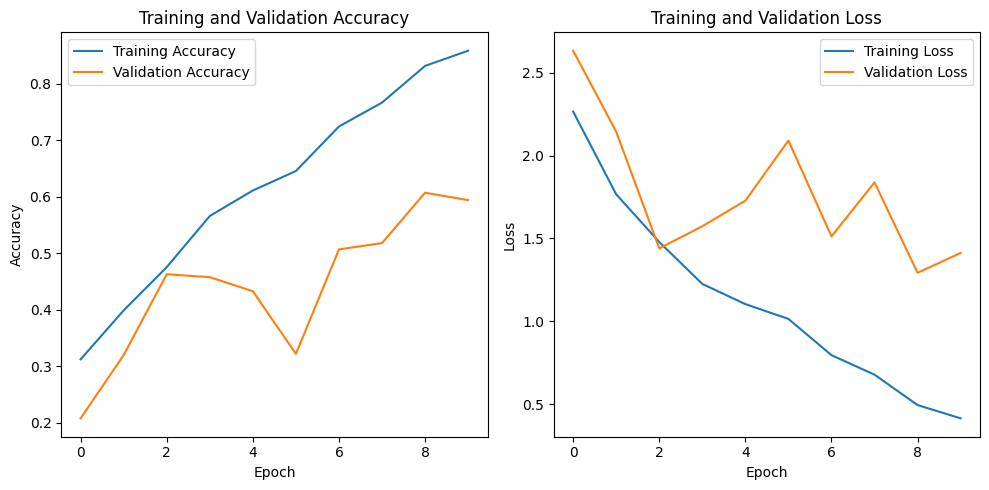

In [19]:
# prompt: # Evaluate on the test set; display suitable metrics

import matplotlib.pyplot as plt
# Evaluate the model on the test set
if 'x_val' in locals() and 'y_val' in locals():
    loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

else:
    print("Validation data (x_val, y_val) not found. Cannot evaluate the model.")


In [ ]:
# prompt: # Define augmentation steps to augment images

import tensorflow as tf

# Define augmentation steps
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)
])


In [ ]:
# prompt: # Create a function to augment the images

import tensorflow as tf

# Define augmentation steps
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2)
])

# Example usage: Apply augmentation to a batch of images
# Assuming 'x_train' is your training image data
augmented_images = data_augmentation(x_train)

# Now 'augmented_images' contains the augmented images.
# You can use this in your model.fit function:
# history = model.fit(augmented_images, y_train, ...)


In [ ]:
# prompt: # Create the augmented training dataset

import numpy as np
# Assuming x_train and y_train are defined from previous code
if 'x_train' in locals() and 'y_train' in locals():
    # Create the augmented training dataset
    augmented_images = []
    augmented_labels = []

    for image, label in zip(x_train, y_train):
        # Apply augmentation transformations to the image
        augmented_image = data_augmentation(np.expand_dims(image, axis=0))  # Add batch dimension

        # Append the augmented images and labels to the lists
        augmented_images.append(np.squeeze(augmented_image, axis=0)) #remove the batch dimension
        augmented_labels.append(label)

    # Convert lists to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_labels = np.array(augmented_labels)

    print("Augmented images shape:", augmented_images.shape)
    print("Augmented labels shape:", augmented_labels.shape)

    #Now you can use augmented_images and augmented_labels in your model training

    #Example:
    #history = model.fit(augmented_images, augmented_labels, epochs=10, batch_size=32, validation_data=(x_val, y_val))
else:
    print("Training data (x_train, y_train) not found. Please run the data loading and preprocessing steps first.")


In [ ]:
# prompt: # Train the model using augmented images

# Assuming x_train, y_train, x_val, y_val, and model are defined from previous code
if 'x_train' in locals() and 'y_train' in locals() and 'x_val' in locals() and 'y_val' in locals() and 'model' in locals():
    # Train the model using augmented images
    history = model.fit(augmented_images, augmented_labels, epochs=10, batch_size=32, validation_data=(x_val, y_val))
else:
    print("Required variables (x_train, y_train, x_val, y_val, model) or augmented data not found. Please run the data loading, preprocessing, augmentation and model definition steps first.")


In [ ]:
# prompt: * Report your findings about the data
# * Report model training results

import matplotlib.pyplot as plt
# Assuming 'history' is the training history object from model.fit
if 'history' in locals():
    # Plot training history
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

    # Evaluate the model
    if 'x_val' in locals() and 'y_val' in locals() and 'model' in locals():
      loss, accuracy = model.evaluate(x_val, y_val, verbose=0)
      print(f"Test Loss: {loss:.4f}")
      print(f"Test Accuracy: {accuracy:.4f}")
else:
    print("Training history not found. Please train the model first.")
